In [1]:
#!pip install pendulum


In [2]:
import pendulum

In [3]:
variable = 'water_surface_height_above_reference_datum'
today = pendulum.today(tz='GMT')
yesterday = today.subtract(days=1)

buoy = '8771450'

url = (
    'https://opendap.co-ops.nos.noaa.gov/ioos-dif-sos/SOS?'
    'service=SOS'
    '&request=GetObservation'
    '&version=1.0.0'
    f'&observedProperty={variable}'
    f'&offering=urn:ioos:station:NOAA.NOS.CO-OPS:{buoy}'
    '&responseFormat=text/csv'
    f'&eventTime={yesterday:%Y-%m-%dT%H:%M:%SZ}/'
    f'{today:%Y-%m-%dT%H:%M:%SZ}'
    '&result=VerticalDatum==urn:ogc:def:datum:epsg::5103'
    '&dataType=PreliminarySixMinute'
)
url1 = ('https://opendap.co-ops.nos.noaa.gov/ioos-dif-sos/SOS?'
        'service=SOS'
        '&request=GetObservation'
        '&version=1.0.0'
        '&observedProperty=air_temperature'
        '&offering=urn:ioos:network:NOAA.NOS.CO-OPS:MetActive'
        '&featureOfInterest=BBOX:-177.3600,-14.2767,167.7361,70.4114'
        '&responseFormat=text/csv'
        '&eventTime=2019-08-13T00:00:00Z/2019-08-13T00:59:00Z'
        '&unit=Celsius'
       )
print(url)
print(url1)

https://opendap.co-ops.nos.noaa.gov/ioos-dif-sos/SOS?service=SOS&request=GetObservation&version=1.0.0&observedProperty=water_surface_height_above_reference_datum&offering=urn:ioos:station:NOAA.NOS.CO-OPS:8771450&responseFormat=text/csv&eventTime=2019-08-15T00:00:00Z/2019-08-16T00:00:00Z&result=VerticalDatum==urn:ogc:def:datum:epsg::5103&dataType=PreliminarySixMinute
https://opendap.co-ops.nos.noaa.gov/ioos-dif-sos/SOS?service=SOS&request=GetObservation&version=1.0.0&observedProperty=air_temperature&offering=urn:ioos:network:NOAA.NOS.CO-OPS:MetActive&featureOfInterest=BBOX:-177.3600,-14.2767,167.7361,70.4114&responseFormat=text/csv&eventTime=2019-08-13T00:00:00Z/2019-08-13T00:59:00Z&unit=Celsius


In [4]:
import pandas as pd


df = pd.read_csv(url, index_col='date_time', parse_dates=True)

df.head()

,station_id,sensor_id,latitude (degree),longitude (degree),water_surface_height_above_reference_datum (m),datum_id,vertical_position (m),sigma,quality_flags
date_time,,,,,,,,,
2019-08-15 00:00:00+00:00,urn:ioos:station:NOAA.NOS.CO-OPS:8771450,urn:ioos:sensor:NOAA.NOS.CO-OPS:8771450:A1,29.31,-94.7933,0.140,urn:ogc:def:datum:epsg::5103,1.379,0.002,0;0;0;0
2019-08-15 00:06:00+00:00,urn:ioos:station:NOAA.NOS.CO-OPS:8771450,urn:ioos:sensor:NOAA.NOS.CO-OPS:8771450:A1,29.31,-94.7933,0.136,urn:ogc:def:datum:epsg::5103,1.379,0.002,1;0;0;0
2019-08-15 00:12:00+00:00,urn:ioos:station:NOAA.NOS.CO-OPS:8771450,urn:ioos:sensor:NOAA.NOS.CO-OPS:8771450:A1,29.31,-94.7933,0.125,urn:ogc:def:datum:epsg::5103,1.379,0.002,1;0;0;0
2019-08-15 00:18:00+00:00,urn:ioos:station:NOAA.NOS.CO-OPS:8771450,urn:ioos:sensor:NOAA.NOS.CO-OPS:8771450:A1,29.31,-94.7933,0.124,urn:ogc:def:datum:epsg::5103,1.379,0.001,1;0;0;0
2019-08-15 00:24:00+00:00,urn:ioos:station:NOAA.NOS.CO-OPS:8771450,urn:ioos:sensor:NOAA.NOS.CO-OPS:8771450:A1,29.31,-94.7933,0.121,urn:ogc:def:datum:epsg::5103,1.379,0.001,1;0;0;0


In [5]:
df1 = pd.read_csv(url1, index_col='date_time', parse_dates=True)

df1.head()

,station_id,sensor_id,latitude (degree),longitude (degree),air_temperature (C),quality_flags
date_time,,,,,,
2019-08-13 00:00:00+00:00,urn:ioos:station:NOAA.NOS.CO-OPS:1611400,urn:ioos:sensor:NOAA.NOS.CO-OPS:1611400:D1,21.9544,-159.3561,27.9,0;0;0
2019-08-13 00:06:00+00:00,urn:ioos:station:NOAA.NOS.CO-OPS:1611400,urn:ioos:sensor:NOAA.NOS.CO-OPS:1611400:D1,21.9544,-159.3561,28.1,0;0;0
2019-08-13 00:12:00+00:00,urn:ioos:station:NOAA.NOS.CO-OPS:1611400,urn:ioos:sensor:NOAA.NOS.CO-OPS:1611400:D1,21.9544,-159.3561,27.9,0;0;0
2019-08-13 00:18:00+00:00,urn:ioos:station:NOAA.NOS.CO-OPS:1611400,urn:ioos:sensor:NOAA.NOS.CO-OPS:1611400:D1,21.9544,-159.3561,28.2,0;0;0
2019-08-13 00:24:00+00:00,urn:ioos:station:NOAA.NOS.CO-OPS:1611400,urn:ioos:sensor:NOAA.NOS.CO-OPS:1611400:D1,21.9544,-159.3561,27.8,0;0;0


/Users/ilhamalami/anaconda3/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


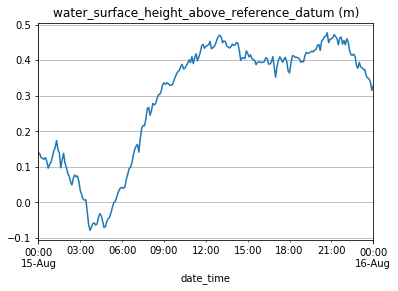

In [6]:
%matplotlib inline

col = df.columns[df.columns.str.startswith(variable)]
ax = df[col].plot.line(legend=False)
ax.grid(True)
ax.set_title(col.values[0]);

/Users/ilhamalami/anaconda3/lib/python3.6/site-packages/pandas/core/sorting.py:257: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  items = np.asanyarray(items)


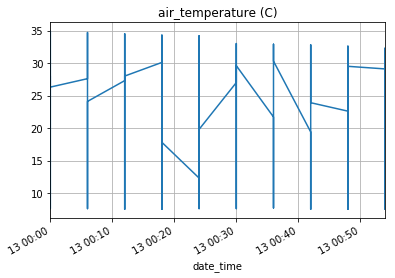

In [7]:
variable1 = 'air_temperature'
col1 = df1.columns[df1.columns.str.startswith(variable1)]
ax1 = df1[col1].plot.line(legend=False)
ax1.grid(True)
ax1.set_title(col1.values[0]);

In [8]:
#!pip install folium

In [9]:
import folium


location = df['latitude (degree)'].unique()[0], df['longitude (degree)'].unique()[0]
m = folium.Map(location=location, zoom_start=12)
folium.Marker(location=location).add_to(m)

m

In [10]:
location1 = df1['latitude (degree)'].unique()[0], df1['longitude (degree)'].unique()[0]
m1 = folium.Map(location=location1, zoom_start=12)
folium.Marker(location=location1).add_to(m)

m1

In [11]:
#!conda install -c conda-forge iris


In [12]:
import iris

In [13]:
url = 'http://thredds.secoora.org/thredds/dodsC/SECOORA_NCSU_CNAPS.nc'
cube = iris.load_cube(url, 'sea_water_potential_temperature')

/Users/ilhamalami/anaconda3/lib/python3.6/site-packages/iris/fileformats/cf.py:1069: UserWarning: Ignoring formula terms variable 'zeta' referenced by data variable 'v' via variable 's_rho': Dimensions ('time', 'eta_rho', 'xi_rho') do not span ('time', 's_rho', 'eta_v', 'xi_v')
  warnings.warn(msg)
/Users/ilhamalami/anaconda3/lib/python3.6/site-packages/iris/fileformats/cf.py:1069: UserWarning: Ignoring formula terms variable 'h' referenced by data variable 'v' via variable 's_rho': Dimensions ('eta_rho', 'xi_rho') do not span ('time', 's_rho', 'eta_v', 'xi_v')
  warnings.warn(msg)
/Users/ilhamalami/anaconda3/lib/python3.6/site-packages/iris/fileformats/cf.py:1069: UserWarning: Ignoring formula terms variable 'zeta' referenced by data variable 'u' via variable 's_rho': Dimensions ('time', 'eta_rho', 'xi_rho') do not span ('time', 's_rho', 'eta_u', 'xi_u')
  warnings.warn(msg)
/Users/ilhamalami/anaconda3/lib/python3.6/site-packages/iris/fileformats/cf.py:1069: UserWarning: Ignoring form

In [14]:
cube

<iris 'Cube' of sea_water_potential_temperature / (degree_Celsius) (time: 7995; ocean_s_coordinate_g2: 36; -- : 482; -- : 402)>

ValueError: 2D coordinate 'Bathymetry At Rho-Points' is not bounded. Guessing bounds of 2D coords is not currently supported.

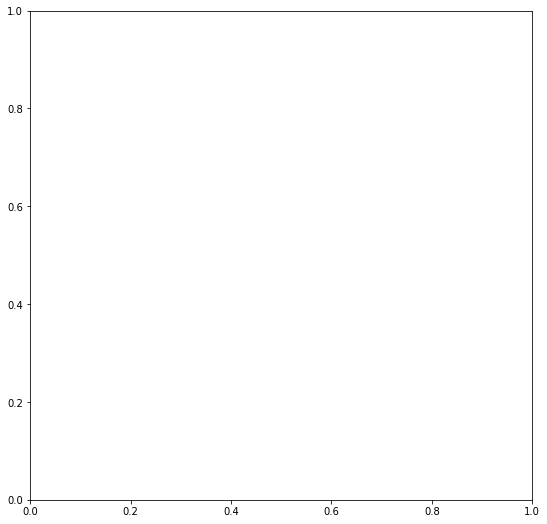

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import iris.quickplot as qplt


fig, ax = plt.subplots(figsize=(9, 9))
cs = qplt.pcolormesh(cube[0, -1, ...])
#cs = qplt.contourf(cube, coords=['lon2d', 'lat2d'])

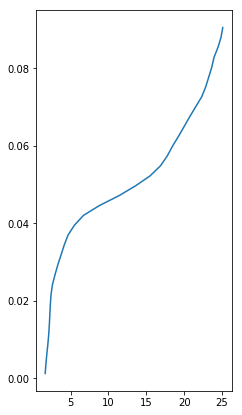

In [16]:
d = cube[0, :, 200, 300]

fig, ax = plt.subplots(figsize=(3.5, 7))
ax.plot(
    d.data,
    d.coord('sea_surface_height_above_reference_ellipsoid').points
);

In [17]:
lon, lat = -50, -40

m = folium.Map(
    location=[lat, lon],
    zoom_start=5,
    control_scale=True
)

In [18]:
from folium import plugins


url = ('http://oos.soest.hawaii.edu/thredds/'
       'wms/hioos/satellite/dhw_5km')
time_interval = '2013-06-03T12:00:00.000Z/2018-07-08T12:00:00.000Z'

w = folium.raster_layers.WmsTileLayer(
    url=url,
    name='sea_surface_temperature',
    styles='boxfill/sst_36',
    fmt='image/png',
    transparent=True,
    layers='CRW_SST',
    overlay=True,
    COLORSCALERANGE='1.2,28',
)

w.add_to(m)

time = plugins.TimestampedWmsTileLayers(
    w,
    period='PT1H',
    time_interval=time_interval
)

time.add_to(m)

folium.LayerControl().add_to(m);

In [19]:
m

In [20]:
#!pip install erddapy

In [21]:
from erddapy import ERDDAP


In [22]:
e = ERDDAP(server='https://data.ioos.us/gliders/erddap')

In [63]:
min_lat, max_lat = 20, 30
min_lon, max_lon = -82, -97
        
kw = {
    'standard_name': 'sea_water_temperature',
    'min_lon': min_lon,
    'max_lon': max_lon,
    'min_lat': min_lat,
    'max_lat': max_lat,
    'min_time': '2019-01-10T00:00:00Z',
    'max_time': '2019-07-13T00:00:00Z',
    'cdm_data_type': 'trajectoryprofile'
}

In [64]:
import pandas as pd


search_url = e.get_search_url(response='csv', **kw)

search = pd.read_csv(search_url)
gliders = search['Dataset ID'].values
print('Found {} Glider Datasets:\n{}'.format(len(gliders), '\n'.join(gliders)))

Found 1 Glider Datasets:
UNH_WBD


In [75]:
server = 'https://data.ioos.us/gliders/erddap'

dataset_id = 'sp067-20190620T1649'

variables = [
 'depth',
 'latitude',
 'longitude',
 'salinity',
 'temperature',
 'time',
]

In [76]:
from erddapy import ERDDAP


e = ERDDAP(
    server=server,
    protocol='tabledap',
)

e.dataset_id = dataset_id
e.variables = variables
        
print(
    e.get_download_url(
        response='mat',
    )
)

https://data.ioos.us/gliders/erddap/tabledap/sp067-20190620T1649.mat?depth,latitude,longitude,salinity,temperature,time


In [77]:
df2 = e.to_pandas(
    index_col='time (UTC)',
    parse_dates=True,
    skiprows=(1,)
).dropna()

df2.head()

,depth (m),latitude (degrees_north),longitude (degrees_east),salinity (1),temperature (Celsius)
time (UTC),,,,,
2019-06-20 18:18:15+00:00,103.785080,34.2937,-119.8034,33.959,9.799
2019-06-20 18:18:15+00:00,103.507225,34.2937,-119.8034,33.959,9.799
2019-06-20 18:18:15+00:00,102.792740,34.2937,-119.8034,33.950,9.817
2019-06-20 18:18:15+00:00,102.197334,34.2937,-119.8034,33.946,9.815
2019-06-20 18:18:15+00:00,101.562230,34.2937,-119.8034,33.942,9.825


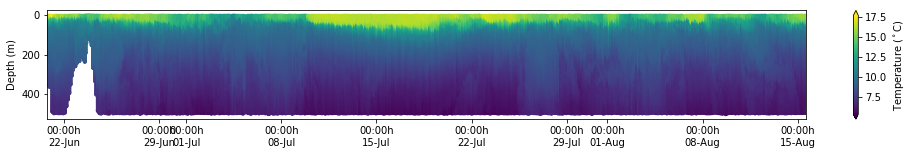

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(df2.index, df2['depth (m)'], s=15, c=df2['temperature (Celsius)'],
                marker='o', edgecolor='none')

ax.invert_yaxis()
ax.set_xlim(df2.index[0], df2.index[-1])
xfmt = mdates.DateFormatter('%H:%Mh\n%d-%b')
ax.xaxis.set_major_formatter(xfmt)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Temperature ($^\circ$C)')
ax.set_ylabel('Depth (m)');

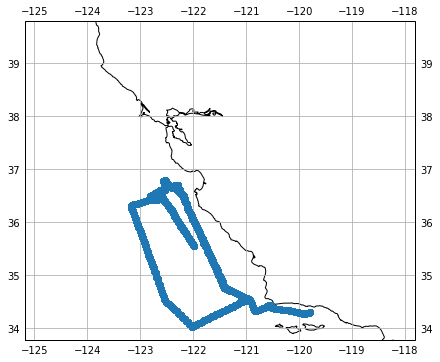

In [79]:
import cartopy.crs as ccrs

fig, ax = plt.subplots(
    subplot_kw={'projection': ccrs.PlateCarree()},
    figsize=(7, 7)
)
ax.plot(df2['longitude (degrees_east)'], df2['latitude (degrees_north)'], 'o')
ax.gridlines(draw_labels=True)
ax.coastlines('10m')
ax.set_extent([df2['longitude (degrees_east)'].min()-2, df2['longitude (degrees_east)'].max()+2,
               df2['latitude (degrees_north)'].min()-0.25, df2['latitude (degrees_north)'].max()+3]);

In [80]:
from datetime import datetime

min_lat, max_lat = 20, 30
min_lon, max_lon = -82, -97
bbox = [min_lon, min_lat, max_lon, max_lat]
crs = 'urn:ogc:def:crs:OGC:1.3:CRS84'

# Temporal range of 1 week.
start = datetime(2017, 4, 14, 0, 0, 0)
stop = datetime(2017, 4, 21, 0, 0, 0)

# Sea surface temperature CF names.
cf_names = ['sea_water_temperature',
            'sea_surface_temperature',
            'sea_water_potential_temperature',
            'equivalent_potential_temperature',
            'sea_water_conservative_temperature',
            'pseudo_equivalent_potential_temperature']

In [81]:
def fes_date_filter(start, stop, constraint='overlaps'):
    from owslib import fes
    start = start.strftime('%Y-%m-%d %H:00')
    stop = stop.strftime('%Y-%m-%d %H:00')
    if constraint == 'overlaps':
        propertyname = 'apiso:TempExtent_begin'
        begin = fes.PropertyIsLessThanOrEqualTo(propertyname=propertyname,
                                                literal=stop)
        propertyname = 'apiso:TempExtent_end'
        end = fes.PropertyIsGreaterThanOrEqualTo(propertyname=propertyname,
                                                 literal=start)
    elif constraint == 'within':
        propertyname = 'apiso:TempExtent_begin'
        begin = fes.PropertyIsGreaterThanOrEqualTo(propertyname=propertyname,
                                                   literal=start)
        propertyname = 'apiso:TempExtent_end'
        end = fes.PropertyIsLessThanOrEqualTo(propertyname=propertyname,
                                              literal=stop)
    else:
        raise NameError('Unrecognized constraint {}'.format(constraint))
    return begin, end

In [82]:
from owslib import fes

kw = dict(
    wildCard='*',
    escapeChar='\\',
    singleChar='?',
    propertyname='apiso:AnyText'
)

or_filt = fes.Or(
    [fes.PropertyIsLike(literal=('*%s*' % val), **kw)
        for val in cf_names])

begin, end = fes_date_filter(start, stop)
bbox_crs = fes.BBox(bbox, crs=crs)

filter_list = [
    fes.And(
        [
            bbox_crs,
            begin, end,
            or_filt,
            fes.Not([fes.PropertyIsLike(literal='*cdip*', **kw)]),
        ]
    )
]

In [83]:
def get_csw_records(csw, filter_list, pagesize=10, maxrecords=1000):
    """Iterate `maxrecords`/`pagesize` times until the requested value in
    `maxrecords` is reached.
    """
    from owslib.fes import SortBy, SortProperty
    # Iterate over sorted results.
    sortby = SortBy([SortProperty('dc:title', 'ASC')])
    csw_records = {}
    startposition = 0
    nextrecord = getattr(csw, 'results', 1)
    while nextrecord != 0:
        csw.getrecords2(constraints=filter_list, startposition=startposition,
                        maxrecords=pagesize, sortby=sortby)
        csw_records.update(csw.records)
        if csw.results['nextrecord'] == 0:
            break
        startposition += pagesize + 1  # Last one is included.
        if startposition >= maxrecords:
            break
    csw.records.update(csw_records)

In [84]:
from owslib.csw import CatalogueServiceWeb


endpoint = 'https://data.ioos.us/csw'

csw = CatalogueServiceWeb(endpoint, timeout=60)

get_csw_records(csw, filter_list, pagesize=10, maxrecords=1000)

records = '\n'.join(csw.records.keys())
print('Found {} records.\n'.format(len(csw.records.keys())))

Found 179 records.



In [85]:
for key, value in list(csw.records.items()):
    print(u'[{}]\n{}\n'.format(value.title, key))

[urn:ioos:station:NOAA.NOS.CO-OPS:sn0701 station, Port Arthur]
opendap.co-ops.nos.noaa.gov-urn_ioos_station_NOAA.NOS.CO-OPS_sn0701

[urn:ioos:station:NOAA.NOS.CO-OPS:t02010 station, Old Port Tampa]
opendap.co-ops.nos.noaa.gov-urn_ioos_station_NOAA.NOS.CO-OPS_t02010

[urn:ioos:station:NOAA.NOS.CO-OPS:t03010 station, Port Manatee]
opendap.co-ops.nos.noaa.gov-urn_ioos_station_NOAA.NOS.CO-OPS_t03010

[VENF1 - Venice, FL]
wmo_venf1

[Venice, FL]
sdf.ndbc.noaa.gov-urn_ioos_station_wmo_venf1

[VENICE INLET AT CROW'S NEST MARINA AT VENICE FL]
gov_usgs_waterdata_02299735

[WACCASASSA RIVER NR GULF HAMMOCK, FLA.]
gov_usgs_waterdata_02313700

[WEST GULF - 207 NM East of Brownsville, TX]
sdf.ndbc.noaa.gov-urn_ioos_station_wmo_42002

[WEST TAMPA  - 112 NM WNW of Tampa, FL]
sdf.ndbc.noaa.gov-urn_ioos_station_wmo_42036

[WITHLACOOCHEE R AT CHAMBERS IS NEAR YANKEETOWN FL]
gov_usgs_waterdata_02313272

[42003 - East GULF - 208 NM West of Naples, FL]
wmo_42003

[42013 - C10 - WFS Central Buoy, 25m Isobat

In [36]:
import textwrap


key, value = list(csw.records.items())[-1]

print('\n'.join(textwrap.wrap(value.abstract)))

NOAA.NOS.CO-OPS Sensor Observation Service (SOS) Server  This station
provides the following variables: Direction of sea water velocity,
Platform orientation, Platform pitch angle, Platform roll angle, Sea
water speed, Sea water temperature


In [37]:
print('\n'.join(value.subjects))

Air Temperature
Barometric Pressure
Conductivity
Currents
Datum
Harmonic Constituents
Rain Fall
Relative Humidity
Salinity
Visibility
Water Level
Water Level Predictions
Water Temperature
Winds
direction_of_sea_water_velocity
platform_orientation
platform_pitch_angle
platform_roll_angle
sea_water_speed
sea_water_temperature
climatologyMeteorologyAtmosphere


In [38]:
!pip install geolinks

In [39]:
from geolinks import sniff_link

msg = 'geolink: {geolink}\nscheme: {scheme}\nURL: {url}\n'.format
for ref in value.references:
    print(msg(geolink=sniff_link(ref['url']), **ref))

geolink: OGC:SOS
scheme: Atchafalaya Bar Channel
URL: https://opendap.co-ops.nos.noaa.gov/ioos-dif-sos/SOS?version=1.0.0&request=DescribeSensor&service=SOS&outputFormat=text/xml; subtype="sensorML/1.0.1/profiles/ioos_sos/1.0"&procedure=urn:ioos:station:NOAA.NOS.CO-OPS:mc0101

geolink: OGC:SOS
scheme: WWW:LINK - text/csv
URL: http://opendap.co-ops.nos.noaa.gov/ioos-dif-sos/SOS?version=1.0.0&eventTime=2019-08-15T15:10:19/2019-08-15T17:10:19&responseFormat=text/csv&offering=urn:ioos:station:NOAA.NOS.CO-OPS:mc0101&request=GetObservation&service=SOS&observedProperty=http://mmisw.org/ont/cf/parameter/direction_of_sea_water_velocity

geolink: OGC:SOS
scheme: WWW:LINK - text/csv
URL: http://opendap.co-ops.nos.noaa.gov/ioos-dif-sos/SOS?version=1.0.0&eventTime=2019-08-15T15:10:19/2019-08-15T17:10:19&responseFormat=text/csv&offering=urn:ioos:station:NOAA.NOS.CO-OPS:mc0101&request=GetObservation&service=SOS&observedProperty=http://mmisw.org/ont/cf/parameter/platform_orientation

geolink: OGC:SOS
s

In [86]:
fmt = ('http://opendap.co-ops.nos.noaa.gov/ioos-dif-sos/SOS?'
       'service=SOS&'
       'eventTime={0:%Y-%m-%dT00:00:00}/{1:%Y-%m-%dT00:00:00}&'
       'observedProperty=http://mmisw.org/ont/cf/parameter/sea_water_temperature&'
       'version=1.0.0&'
       f'request=GetObservation&offering=urn:ioos:station:NOAA.NOS.CO-OPS:8771450&'
       'responseFormat=text/csv')

url = fmt.format(start, stop)

In [87]:
import pandas as pd

df = pd.read_csv(
    url,
    parse_dates=True
)
df.head()

,station_id,sensor_id,latitude (degree),longitude (degree),date_time,sea_water_temperature (C),quality_flags
0,urn:ioos:station:NOAA.NOS.CO-OPS:8771450,urn:ioos:sensor:NOAA.NOS.CO-OPS:8771450:E1,29.31,-94.7933,2017-04-14T00:00:00Z,23.2,0;0;0
1,urn:ioos:station:NOAA.NOS.CO-OPS:8771450,urn:ioos:sensor:NOAA.NOS.CO-OPS:8771450:E1,29.31,-94.7933,2017-04-14T00:06:00Z,23.3,0;0;0
2,urn:ioos:station:NOAA.NOS.CO-OPS:8771450,urn:ioos:sensor:NOAA.NOS.CO-OPS:8771450:E1,29.31,-94.7933,2017-04-14T00:12:00Z,23.3,0;0;0
3,urn:ioos:station:NOAA.NOS.CO-OPS:8771450,urn:ioos:sensor:NOAA.NOS.CO-OPS:8771450:E1,29.31,-94.7933,2017-04-14T00:18:00Z,23.3,0;0;0
4,urn:ioos:station:NOAA.NOS.CO-OPS:8771450,urn:ioos:sensor:NOAA.NOS.CO-OPS:8771450:E1,29.31,-94.7933,2017-04-14T00:24:00Z,23.3,0;0;0


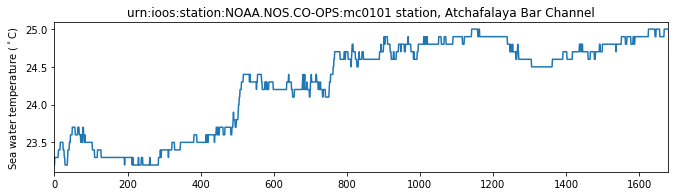

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(11, 2.75))
ax = df['sea_water_temperature (C)'].plot(ax=ax)
ax.set_xlabel('')
ax.set_ylabel(r'Sea water temperature ($^\circ$C)')
ax.set_title(value.title);

In [43]:
from erddapy import ERDDAP


server = 'http://www.neracoos.org/erddap'
e = ERDDAP(server=server)

e.protocol = 'tabledap'

In [44]:
import pendulum


initial_standard_name = 'significant_height_of_wind_and_swell_waves'

zoom = 6
center = [42.5, -68]
nchar = 3 # number of characters for short dataset name
cdm_data_type = 'TimeSeries'

max_time = pendulum.now(tz='UTC')
min_time = max_time.subtract(weeks=2)

In [45]:
import pandas as pd


url = '{}/categorize/standard_name/index.csv'.format(server)
df = pd.read_csv(url, skiprows=[1, 2])
variables = df['Category'].values

In [46]:
df.head()

,Category,URL
0,air_pressure_at_sea_level,http://www.neracoos.org/erddap/categorize/stan...
1,air_pressure_status_flag,http://www.neracoos.org/erddap/categorize/stan...
2,air_temp,http://www.neracoos.org/erddap/categorize/stan...
3,air_temperature,http://www.neracoos.org/erddap/categorize/stan...
4,air_temperature_data_quality,http://www.neracoos.org/erddap/categorize/stan...


In [47]:
import ipywidgets

dpdown = ipywidgets.Dropdown(options=variables, value=initial_standard_name)

In [48]:
def point(dataset, lon, lat, nchar):
    geojsonFeature = {
        "type": "Feature",
        "properties": {
            "datasetID": dataset,
            "short_dataset_name": dataset[:nchar]
        },
        "geometry": {
            "type": "Point",
            "coordinates": [lon, lat]
        }
    };
    geojsonFeature['properties']['style'] = {'color': 'Grey'}
    return geojsonFeature

In [49]:
def adv_search(e, standard_name, cdm_data_type, min_time, max_time):
    try:
        search_url = e.get_search_url(
            response='csv',
            cdm_data_type=cdm_data_type.lower(),
            items_per_page=100000,
            standard_name=standard_name,
            min_time=min_time,
            max_time=max_time
        )
        df = pd.read_csv(search_url)
    except:
        df = []
        if len(var)>14:
            v = '{}...'.format(standard_name[:15])
        else:
            v = standard_name
        figure.title = 'No {} found in this time range. Pick another variable.'.format(v)
        figure.marks[0].y = 0.0 * figure.marks[0].y
    return df

In [50]:
def alllonlat(e, cdm_data_type, min_time, max_time):
    import io
    import requests
    url = (
        f'{e.server}/tabledap/allDatasets.csv?'
        'datasetID,minLongitude,minLatitude'
        f'&cdm_data_type="{cdm_data_type}"'
        f'&minTime<={max_time}'
        f'&maxTime>={min_time}'
    )
    data = io.BytesIO(requests.get(url).content)
    df = pd.read_csv(data, skiprows=[1])
    return df

In [51]:
def stdname2geojson(e, standard_name, min_time, max_time, nchar):
    dfa = adv_search(e, standard_name, cdm_data_type, min_time, max_time)
    if isinstance(dfa, pd.DataFrame):
        datasets = dfa['Dataset ID'].values
        dfll = alllonlat(e, cdm_data_type, min_time, max_time)
        dfr = dfll[dfll['datasetID'].isin(dfa['Dataset ID'])]
        geojson = {'features':[point(row[1],row[2],row[3],nchar) for row in dfr.itertuples()]}
    else:
        geojson = {'features':[]}
        datasets = []
    return geojson, datasets

In [52]:
def click_handler(event=None, id=None, properties=None):
    datasetID = properties['datasetID']
    kwargs = {'time>=': min_time, 'time<=': max_time}
    df, var = get_data(datasetID, dpdown.value, kwargs)
    figure.marks[0].x = df.index
    figure.marks[0].y = df[var]
    figure.title = '{} - {}'.format(properties['short_dataset_name'], var)

In [53]:
#!pip install ipyleaflet

In [54]:
import ipyleaflet


def update_dpdown(change):
    standard_name = change['new']
    data, datasets = stdname2geojson(e, standard_name, min_time, max_time, nchar)
    feature_layer = ipyleaflet.GeoJSON(data=data)
    feature_layer.on_click(click_handler)
    m.layers = [m.layers[0], feature_layer]

In [55]:
dpdown.observe(update_dpdown, names=['value'])

In [56]:
def get_data(dataset, standard_name, kwargs):
    var = e.get_var_by_attr(
        dataset_id=dataset,
        standard_name=lambda v: str(v).lower() == standard_name)[0]
    e.dataset_id = dataset
    e.variables = ['time (UTC)', var]
    e.constraints = kwargs
    df = e.to_pandas(parse_dates=True, skiprows=[1])
    return df, var

In [57]:
m = ipyleaflet.Map(
    center=center,
    zoom=zoom,
)

data, datasets = stdname2geojson(e, initial_standard_name, min_time, max_time, nchar)
feature_layer = ipyleaflet.GeoJSON(data=data)
feature_layer.on_click(click_handler)
m.layers = [m.layers[0], feature_layer]

In [58]:
m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

In [59]:
#!pip install bqplot

In [60]:
import bqplot


dt_x = bqplot.DateScale()
sc_y = bqplot.LinearScale()

initial_dataset = datasets[1]


In [61]:
initial_dataset

'B01_accelerometer_all'

In [62]:
kwargs = {'time (UTC)>=': min_time, 'time (UTC)<=': max_time}
df, var = get_data(initial_dataset, initial_standard_name, kwargs)
time_series = bqplot.Lines(x=df.index, y=df[var], scales={'x': dt_x, 'y': sc_y})
ax_x = bqplot.Axis(scale=dt_x, label='Time')
ax_y = bqplot.Axis(scale=sc_y, orientation='vertical')
figure = bqplot.Figure(marks=[time_series], axes=[ax_x, ax_y])
figure.title = '{} - {}'.format(initial_dataset[:nchar], var)
figure.layout.height = '300px'
figure.layout.width = '800px'

HTTPError: 500 Server Error: Internal Server Error for url: http://www.neracoos.org/erddap/tabledap/B01_accelerometer_all.csvp?time%20(UTC),significant_wave_height&time%20(UTC)%3E=1564710871.023974&time%20(UTC)%3C=1565920471.023974

In [ ]:
%debug

In [ ]:
ipywidgets.VBox([dpdown, m, figure])